# **PEMANFAATAN MACHINE LEARNING DALAM ESTIMASI PADA DAERAH YANG BERPOTENSI GEMPA BUMI DENGAN MENGGUNAKAN MODEL REGRESI LINEAR**

#**Disusun oleh:** 
<br>Nama: Firdaus Youichi Yamamoto 
<br>NIM: A11.2022.14607 
<br>Kelas/Kelompok: Pembelajaran Mesin A11.4410 

# **Ringkasan**

Estimasi gempa bumi di Indonesia menggunakan machine learning adalah upaya untuk memahami dan meramalkan kejadian gempa dengan memanfaatkan data historis dan algoritma canggih. Proses ini melibatkan pengumpulan data gempa, seperti magnitudo, kedalaman, dan lokasi, yang kemudian diproses dan dianalisis untuk menemukan pola yang dapat membantu memprediksi gempa di masa depan. Algoritma regresi dan klasifikasi digunakan untuk memprediksi kekuatan gempa dan kemungkinan terjadinya di area tertentu. Namun, tantangan utama dalam proyek ini meliputi ketersediaan dan kualitas data serta kompleksitas fenomena gempa yang tidak selalu sepenuhnya terwakili dalam data yang ada. Meskipun demikian, jika berhasil, model machine learning ini bisa menjadi alat penting dalam mitigasi risiko bencana di Indonesia, dengan memberikan peringatan dini yang lebih baik dan membantu dalam perencanaan tanggap darurat.

# **Masalah**

Permasalahan utama dalam prediksi gempa bumi menggunakan machine learning meliputi beberapa aspek. Pertama, ketersediaan dan kualitas data menjadi kendala, karena data historis gempa mungkin tidak lengkap atau akurat, serta tidak selalu mencakup semua faktor yang relevan, seperti informasi geofisika dan aktivitas tektonik. Kedua, gempa bumi adalah fenomena alam yang sangat kompleks, dipengaruhi oleh banyak variabel yang tidak sepenuhnya dipahami atau diukur, membuat prediksi akurat menjadi sulit. Ketiga, interpretasi hasil model juga menghadapi tantangan, karena prediksi yang tidak tepat dapat menimbulkan kepanikan atau kesalahpahaman di masyarakat. Oleh karena itu, pengembangan model machine learning untuk prediksi gempa harus dilakukan dengan hati-hati, memperhatikan aspek teknis dan sosial, serta berkolaborasi dengan ahli geologi dan otoritas terkait untuk memastikan hasil yang bermanfaat dan bertanggung jawab.

# **Tujuan yang akan dicapai**

Tujuan dari penggunaan machine learning untuk prediksi gempa bumi di Indonesia adalah untuk meningkatkan pemahaman kita tentang pola dan faktor-faktor yang mempengaruhi terjadinya gempa. Dengan memanfaatkan algoritma machine learning, diharapkan dapat dikembangkan model prediksi yang lebih akurat, yang mampu memperkirakan magnitudo dan lokasi gempa potensial berdasarkan data historis dan geofisika. Tujuan akhirnya adalah untuk menyediakan peringatan dini yang lebih baik kepada masyarakat dan pemerintah, sehingga langkah-langkah mitigasi dan persiapan darurat dapat diambil lebih efektif. Ini akan membantu mengurangi dampak dari bencana gempa bumi, melindungi nyawa, dan meminimalkan kerugian ekonomi serta infrastruktur.

# **Model / Alur Penyelesaian**

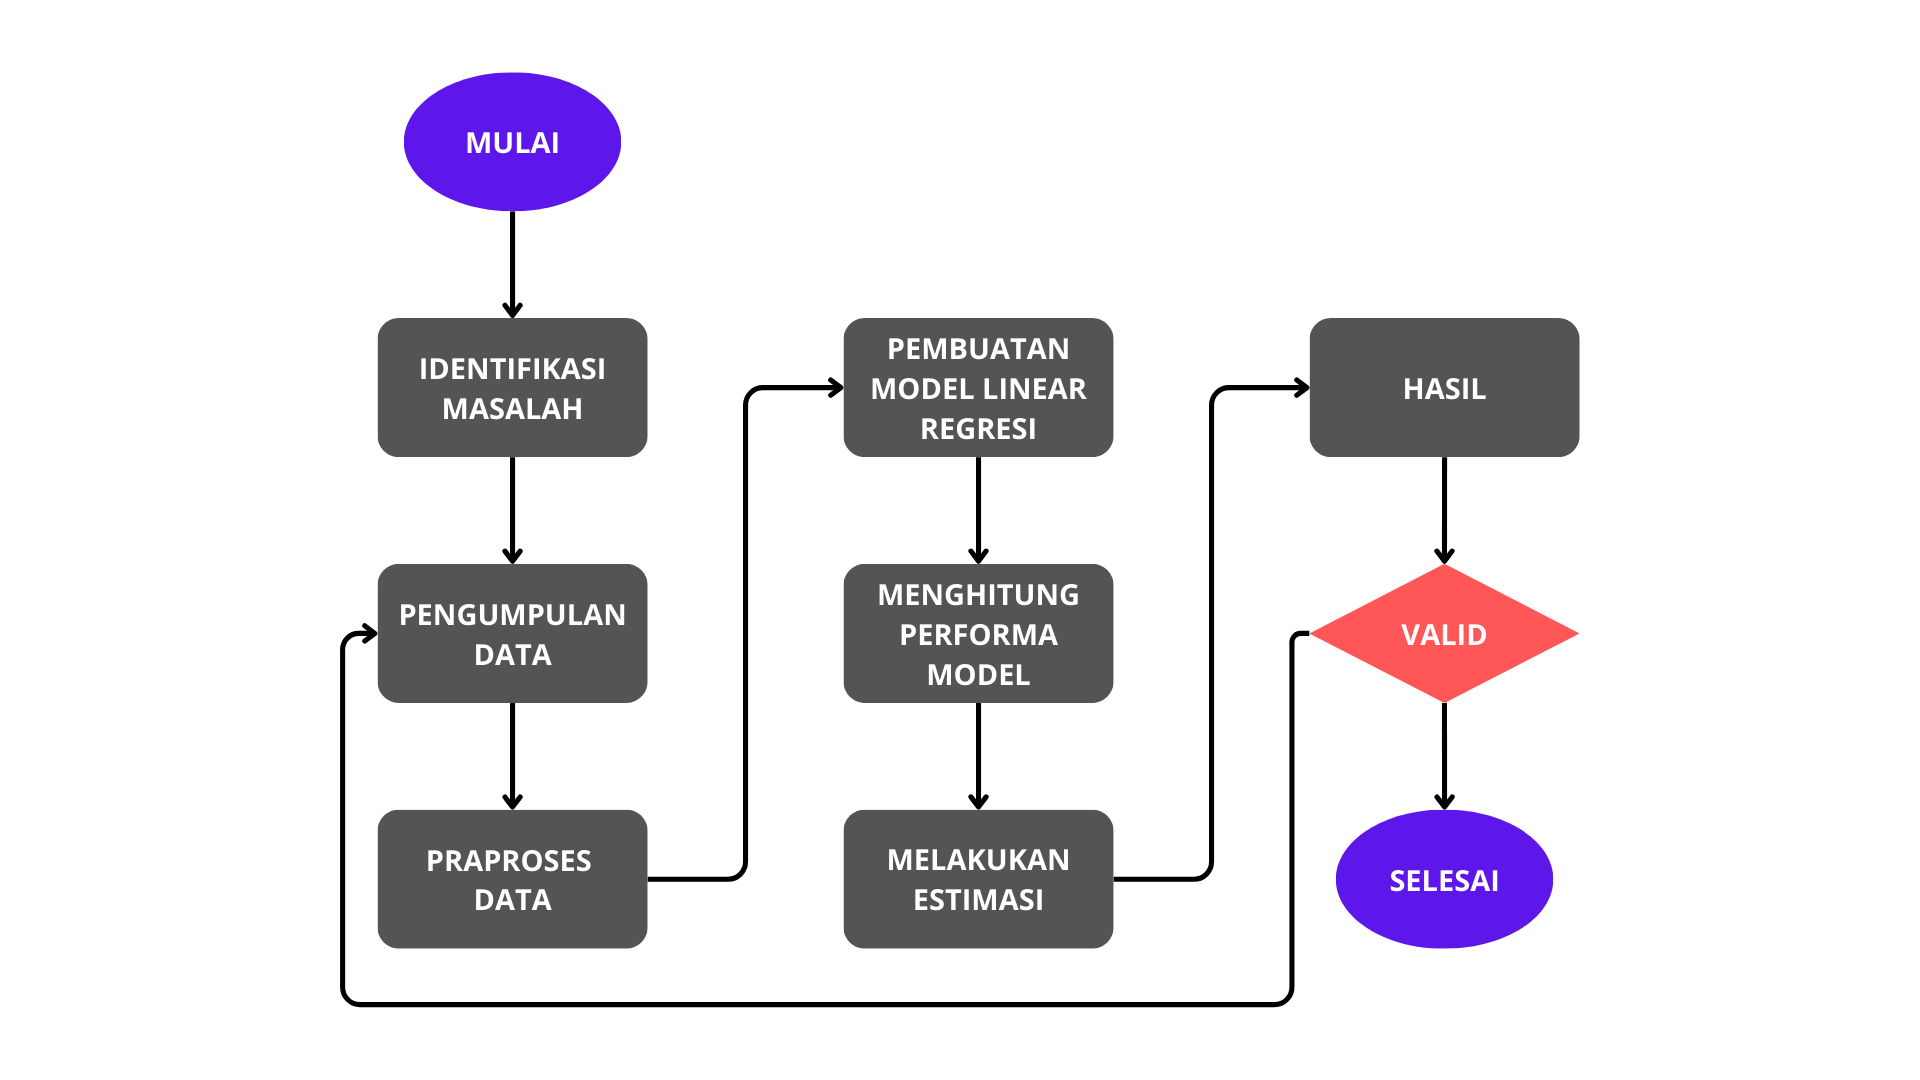

# **Mengimport Library**

Berikut ini adalah library yang digunakan untuk mengolah datasets:
* Pandas: Untuk manipulasi dan analisis data, termasuk pembersihan dan transformasi data.
* NumPy: Untuk komputasi numerik dan operasi array.
* Matplotlib dan Seaborn: Untuk visualisasi data, seperti plot, grafik, dan heatmap.
* Scikit-learn: Untuk algoritma machine learning, seperti regresi, klasifikasi, dan evaluasi model.
* Folium: Untuk peta interaktif, berguna jika kamu ingin memvisualisasikan lokasi episentrum gempa.

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import folium

# **Penjelasan Dataset**

Dataset ini didapat dari kumpulan data gempa yang dikelola oleh BMKG(Badan Meteorologi, Klimatologi, dan Geofisika), bisa didapat di website Kaggle.
<br> Dalam dataset "katalog_gempa.csv" ini terdapat features atau kolom seperti berikut:
* tgl (Tanggal): Tanggal terjadinya gempa bumi.
* ot (Timestamp): Waktu terjadinya gempa bumi, dalam format timestamp.
* lat (Latitude): Lintang episentrum gempa, dalam derajat, berkisar dari 6°N hingga 11°S.
* lon (Longitude): Bujur episentrum gempa, dalam derajat, berkisar dari 142°E hingga 94°E.
* depth (Kedalaman): Kedalaman gempa dalam kilometer.
* mag (Magnitudo): Magnitudo gempa, berkisar dari 1 hingga 9.5.
* remark (Wilayah Flinn-Engdahl): Wilayah gempa menurut klasifikasi Flinn-Engdahl.
* dip1, strike1, rake1: Parameter-parameter mekanisme fokal pertama, yang menjelaskan orientasi dan gerakan slip pada patahan.
* dip2, strike2, rake2: Parameter-parameter mekanisme fokal kedua, jika tersedia, memberikan informasi tambahan tentang gerakan patahan.

Dataset ini memiliki 9 features/kolom dan 92887 entri/baris. Dataset ini bersifat publik.

# **Exploratory Data Analysis (EDA)**

## 1. Memuat Dataset

Memuat dataset yang digunakan dari sumber data, yaitu "katalog_gempa.csv" kedalam data frame dengan menggunakan pandas.

In [2]:
#Memuat dataset (katalog_gempa.csv)
data = pd.read_csv('katalog_gempa.csv')

## 2. Menampilkan 5 baris awal dari dataset

In [3]:
#Menampilkan baris
print(data.head())

          tgl            ot   lat     lon  depth  mag  \
0  2008/11/01  21:02:43.058 -9.18  119.06     10  4.9   
1  2008/11/01  20:58:50.248 -6.55  129.64     10  4.6   
2  2008/11/01  17:43:12.941 -7.01  106.63    121  3.7   
3  2008/11/01  16:24:14.755 -3.30  127.85     10  3.2   
4  2008/11/01  16:20:37.327 -6.41  129.54     70  4.3   

                     remark  strike1  dip1  rake1  strike2  dip2  rake2  
0  Sumba Region - Indonesia      NaN   NaN    NaN      NaN   NaN    NaN  
1                 Banda Sea      NaN   NaN    NaN      NaN   NaN    NaN  
2          Java - Indonesia      NaN   NaN    NaN      NaN   NaN    NaN  
3         Seram - Indonesia      NaN   NaN    NaN      NaN   NaN    NaN  
4                 Banda Sea      NaN   NaN    NaN      NaN   NaN    NaN  


## 3. Visualisasi distribusi magnitudo gempa

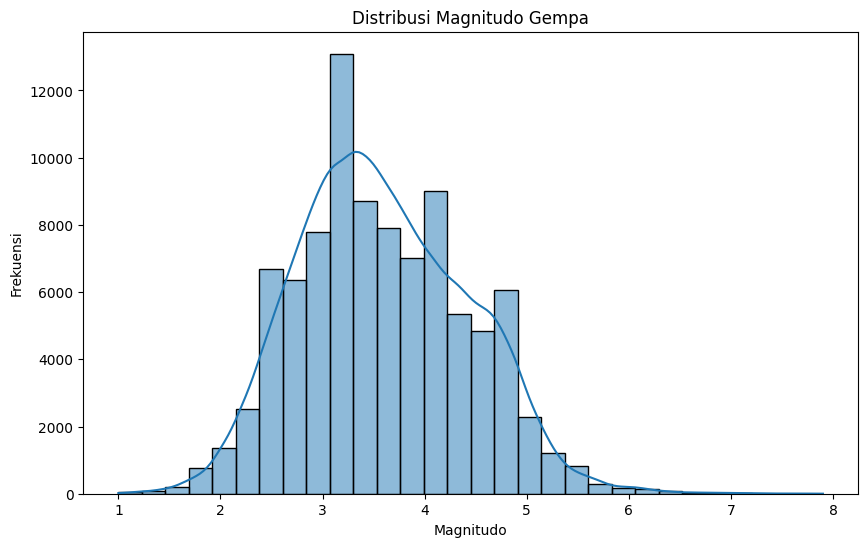

In [4]:
#Visualisizing Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['mag'], kde=True, bins=30)
plt.title('Distribusi Magnitudo Gempa')
plt.xlabel('Magnitudo')
plt.ylabel('Frekuensi')
plt.show()

## 4. Visualisasi heatmap korelasi

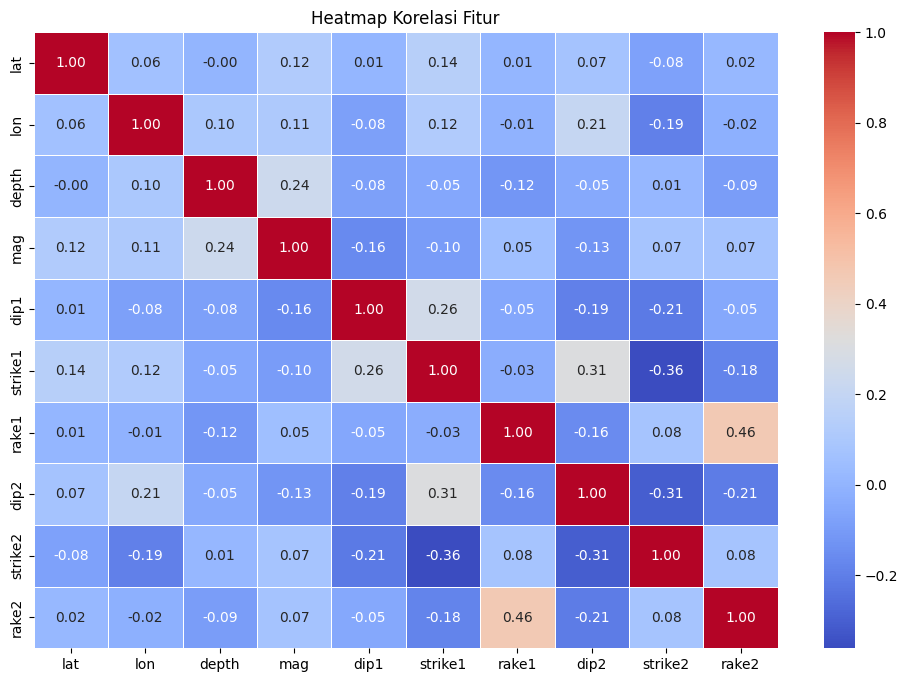

In [5]:
#Menghitung korelasi 
corr_matrix = data[['lat', 'lon', 'depth', 'mag', 'dip1', 'strike1', 'rake1', 'dip2', 'strike2', 'rake2']].corr()

# Visualisasi heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap Korelasi Fitur')
plt.show()

# **Proses Features Dataset**

## 1. Reprocessing Data

Menyiapkan data seperti menghilangkan nilai kosong.

In [6]:
#Preprocessing
data = data.dropna()

## 2. Feature Engineering

Melakukan proses untuk mengembangkan dan memilih suatu feature yang akan digunakan untuk melakukan analisis data.

In [7]:
#Feature engineering
data['remark'] = data['remark'].astype('category').cat.codes

## 3. Menentukan Features dan Target Variable

* Features: Variabel input yang digunakan untuk memprediksi variabel target.
* Target: Variabel output yang ingin diprediksi atau dijelaskan.

In [8]:
#Features dan target variable
X = data[['lat', 'lon', 'depth', 'remark', 'dip1', 'strike1', 'rake1', 'dip2', 'strike2', 'rake2']]
y = data['mag']

## 4. Spliting Data Training dan Data Testing

In [9]:
#Memisahkan dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Proses Learning dan Modeling**

In [10]:
#Inisialisasi dan training Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

## 1. Membuat prediksi

In [11]:
y_pred = model.predict(X_test)

## 2. Evaluasi model

In [12]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.2966307221206582
R^2 Score: 0.2623066928975478


## 3. Visualisasi hasil

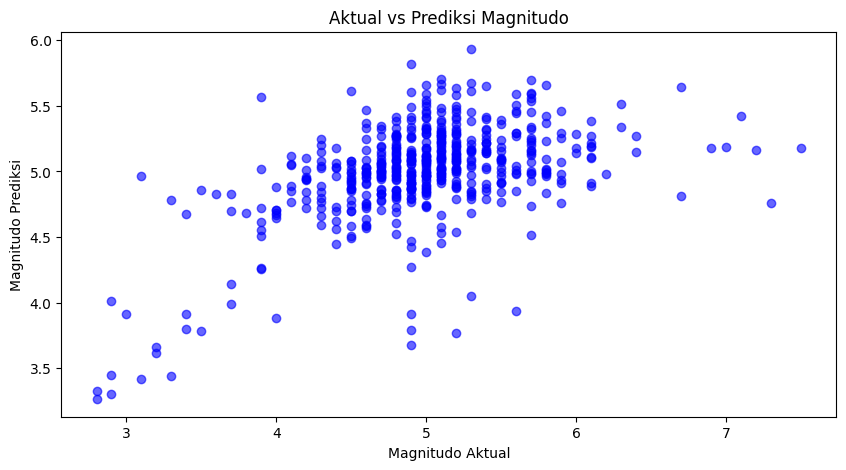

In [13]:
#Visualizing Result
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.6, color='b')
plt.xlabel('Magnitudo Aktual')
plt.ylabel('Magnitudo Prediksi')
plt.title('Aktual vs Prediksi Magnitudo')
plt.show()

# 4. Visualisasi hasil menggunakan Folium

In [14]:
#Folium Visualizing
map = folium.Map(location=[-2.5489, 118.0149], zoom_start=5,
               zoom_control=False,
               scrollWheelZoom=False,
               dragging=False)
for lat, lon, actual, pred in zip(X_test['lat'], X_test['lon'], y_test, y_pred):
    folium.Marker(location=[lat, lon], 
                  popup=f'Actual: {actual}, Predicted: {pred}',
                  icon=folium.Icon(color='blue')).add_to(map)

In [15]:
#Menampilkan Peta
map

# **Akurasi Model**

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R²) Score: {r2}')

Mean Absolute Error (MAE): 0.4043747714808046
Mean Squared Error (MSE): 0.2966307221206582
Root Mean Squared Error (RMSE): 0.5446381570553593
R-squared (R²) Score: 0.2623066928975478


# **Diskusi Hasil**

Pada tahap diskusi hasil ini kita akan memulai estimasi dengan cara membuat sebuah inputan data dari model Linear Regression terlebih dahulu.

In [19]:
# Mengambil 5 contoh data dari dataset pengujian
sample_data = X_test.head(5)

# Melakukan prediksi pada contoh data tersebut
sample_predictions = model.predict(sample_data)

# Menggabungkan data asli dengan hasil prediksi untuk visualisasi
sample_data['Magnitudo Aktual'] = y_test.head(5)
sample_data['Magnitudo Prediksi'] = sample_predictions

# Menampilkan data asli dan prediksi
print(sample_data)

# Alternatif visualisasi sederhana
for i in range(len(sample_data)):
    print(f"Sample {i+1}:")
    print(f"  Latitude: {sample_data.iloc[i]['lat']}, Longitude: {sample_data.iloc[i]['lon']}")
    print(f"  Actual Magnitude: {sample_data.iloc[i]['Magnitudo Aktual']}")
    print(f"  Predicted Magnitude: {sample_data.iloc[i]['Magnitudo Prediksi']}\n")


        lat     lon  depth  remark  dip1  strike1  rake1  dip2  strike2  \
81529 -7.48  105.86     50      14  67.5    100.2   58.0  38.4   338.73   
73595  3.91  128.61     10      21  40.8    209.6   82.6  49.6    39.40   
30695 -2.70  139.24     10      19  87.3    272.2  141.0  51.1     4.35   
43927 -8.41  116.57     10      38  56.9    162.4  166.3  78.6   259.99   
78938 -7.60  105.84     47      14  75.8    102.3   67.3  26.6   342.06   

       rake2  Magnitudo Aktual  Magnitudo Prediksi  
81529  142.0               5.0               4.943  
73595   96.4               4.9               5.097  
30695    3.5               4.9               4.974  
43927   33.8               5.4               4.791  
78938  146.9               4.5               4.992  
Sample 1:
  Latitude: -7.48, Longitude: 105.86
  Actual Magnitude: 5.0
  Predicted Magnitude: 4.942999999999994

Sample 2:
  Latitude: 3.91, Longitude: 128.61
  Actual Magnitude: 4.9
  Predicted Magnitude: 5.097000000000002

Sample

C:\Users\user\AppData\Local\Temp\ipykernel_8976\1584977205.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['Magnitudo Aktual'] = y_test.head(5)
C:\Users\user\AppData\Local\Temp\ipykernel_8976\1584977205.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_data['Magnitudo Prediksi'] = sample_predictions


# **Kesimpulan**

Kesimpulannya, model Random Forest Regressor yang digunakan untuk memprediksi magnitudo gempa bumi berdasarkan data lokasi dan karakteristik gempa lainnya menghasilkan nilai R-squared (R²) Score sebesar 0.2623066928975478. Skor R² ini menunjukkan bahwa model mampu menjelaskan sekitar 26.23% dari variasi dalam data magnitudo gempa bumi yang diamati. Meskipun ini menunjukkan bahwa model menangkap beberapa informasi yang relevan dari fitur input, masih ada 73.77% dari variasi yang tidak dijelaskan, menunjukkan bahwa model ini memiliki keterbatasan dalam prediksi yang akurat. Hasil ini mungkin mengindikasikan perlunya eksplorasi fitur tambahan, penyesuaian model, atau pendekatan lain untuk meningkatkan akurasi prediksi.